Imports models: (LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SupportVectorMachine, GaussianNB, MultinomialNb, BernouliNB, AdaBoostClaassifier)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, log_loss
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

- Read files


In [8]:
dataframe = pd.read_csv("C:/Users/Rohan Mahesh Rao/Desktop/DIP_project/spreadsheets/Specklefilter_Data_actual.csv")
dataframe.head()

,image_name,hueval,satval,valval,kernel_size,SSI_kernel,Win_best,SSI_max
0,noise1.png,5,4,4,4,0.453,5,0.487
1,noise2.png,5,6,4,5,0.426,5,0.426
2,noise3.png,5,8,6,5,0.450,5,0.450
3,noise4.png,5,5,5,5,0.402,5,0.402
4,noise5.png,5,5,7,6,0.355,5,0.368


- Preprocessing

In [44]:
dataframe = dataframe.sample(frac = 1) # to shuffle the dataset 
y = dataframe['kernel_size']
feature_names = ['hueval','satval','valval']
x = dataframe[feature_names]
x.head()

,hueval,satval,valval
532,5,7,5
397,5,8,5
163,5,7,4
113,5,7,4
153,5,8,5


Train-Test split

In [45]:
x = np.asarray(x).astype('float32')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.01, shuffle=True)

Fitting and Defining Classifier functions

In [46]:

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = SVC()
model5 = GaussianNB()
model6 = MultinomialNB()
model7 = BernoulliNB()
model8 = AdaBoostClassifier()


#training
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_test)
model4.fit(x_train, y_train)
pred4 = model4.predict(x_test)
model5.fit(x_train, y_train)
pred5 = model5.predict(x_test)
model6.fit(x_train, y_train)
pred6 = model6.predict(x_test)
model7.fit(x_train, y_train)
pred7 = model7.predict(x_test)
model8.fit(x_train, y_train)
pred8 = model8.predict(x_test)

def get_kernel1(x_given):
    return model1.predict(x_given)
def get_kernel2(x_given):
    return model2.predict(x_given)
def get_kernel3(x_given):
    return model3.predict(x_given)
def get_kernel4(x_given):
    return model4.predict(x_given)
def get_kernel5(x_given):
    return model5.predict(x_given)
def get_kernel6(x_given):
    return model6.predict(x_given)
def get_kernel7(x_given):
    return model7.predict(x_given)
def get_kernel8(x_given):
    return model8.predict(x_given)

c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicting widow size for filter using the models defined above

In [47]:
hsv_inputs = open("C:/Users/Kavita/Desktop/Image_Despeckling/Image-Despeckling/hsv_inputs.txt","r")
x_inp = str(hsv_inputs.read())
x_given = []

for i in range (0,3):
    x_given.append(int(x_inp[i]))

print(x_given)

pre1 = get_kernel1([x_given])
print("Predicted kernel size for 1 :",round(pre1[0]))
pre2 = get_kernel2([x_given])
print("Predicted kernel size for 2 :",round(pre2[0]))
pre3 = get_kernel3([x_given])
print("Predicted kernel size for 3 :",round(pre3[0]))
pre4 = get_kernel4([x_given])
print("Predicted kernel size for 4 :",round(pre4[0]))
pre5 = get_kernel5([x_given])
print("Predicted kernel size for 5 :",round(pre5[0]))
pre6 = get_kernel6([x_given])
print("Predicted kernel size for 6 :",round(pre6[0]))
pre7 = get_kernel7([x_given])
print("Predicted kernel size for 7 :",round(pre7[0]))
pre8 = get_kernel8([x_given])
print("Predicted kernel size for 8 :",round(pre8[0]))


[5, 6, 6]
Predicted kernel size for 1 : 5
Predicted kernel size for 2 : 5
Predicted kernel size for 3 : 5
Predicted kernel size for 4 : 5
Predicted kernel size for 5 : 6
Predicted kernel size for 6 : 5
Predicted kernel size for 7 : 5
Predicted kernel size for 8 : 5


Performance Metrics (MeanSquaredError, RootMeanSquareError, MeanAbsoluteError, R2score)

In [48]:
# Calculating MeanSquaredError

preds = [pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8]
mses = []

for pred in preds:
    mse = mean_squared_error(y_test, pred)
    mses.append(mse)

print(mses)

# Calculating RootMeanSquaredError

rmses = []

for mse in mses:
    rms = np.sqrt(mse)
    rmses.append(rms)

print(rmses)

# Calculating MeanAbsoluteError

maes = []

for pred in preds:
    mae = mean_absolute_error(y_test, pred)
    maes.append(mae)

print(maes)


#Calculating R2Score

r2s = []

for pred in preds:
    r2 = r2_score(y_test, pred)
    r2s.append(r2)

print(r2s)



[0.3333333333333333, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 2.8333333333333335, 0.3333333333333333, 0.3333333333333333, 9.333333333333334]
[0.5773502691896257, 0.9128709291752769, 0.9128709291752769, 0.9128709291752769, 1.6832508230603465, 0.5773502691896257, 0.5773502691896257, 3.0550504633038935]
[0.3333333333333333, 0.5, 0.5, 0.5, 1.5, 0.3333333333333333, 0.3333333333333333, 3.0]
[0.0, -1.5, -1.5, -1.5, -7.5, 0.0, 0.0, -27.0]


Data Visualisation

c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

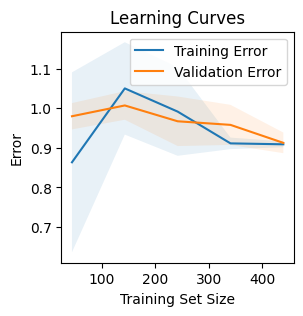

c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


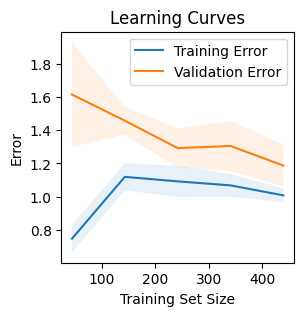

c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


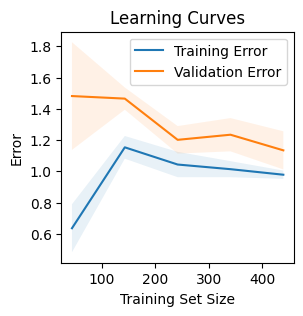

c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


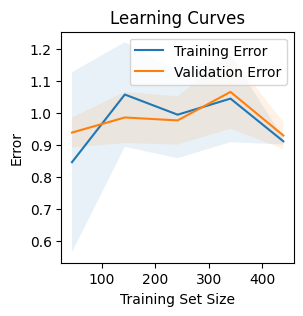

c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


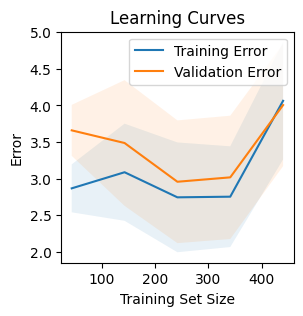

c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


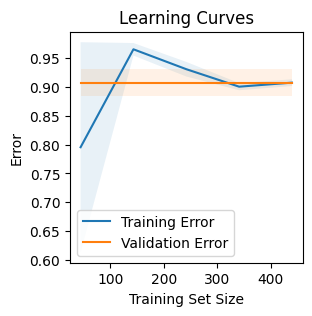

c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


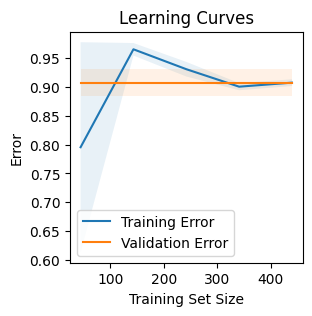

c:\Users\Kavita\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


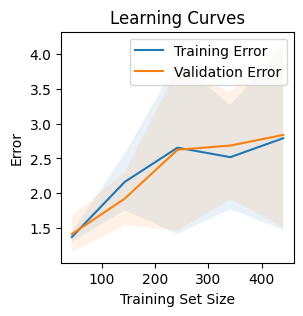

In [53]:

def plot_learning_curves(classifier, x, y):
    plt.figure(figsize=(3,3))
    train_sizes, train_scores, valid_scores = learning_curve(classifier, x, y, cv=5, scoring='neg_mean_squared_error')
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = -np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='Training Error')
    plt.plot(train_sizes, valid_mean, label='Validation Error')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), GaussianNB(), MultinomialNB(), BernoulliNB(), AdaBoostClassifier()]

for classifier in classifiers:
    plot_learning_curves(classifier, x, y)


